In [20]:
import rt_nbow2

rt_nbow2.train_mlp(max_epochs=50, input_path="../data/rt/", outDir="../models/tmp/", fold=0)

model options {'input_path': '../data/rt/', 'validFreq': 300, 'batch_size': 32, 'num_anch_vec': 1, 'fold': 0, 'word_dropout': 0.3, 'lrate': 0.0001, 'max_epochs': 50, 'dispFreq': 50, 'optimizer': <function adadelta at 0x12891a500>, 'patience': 10, 'test_batch_size': 32, 'dim_proj': 300, 'maxlen': 500, 'saveto': 'rt_nbow2_fold0-model.npz', 'random_init': 1, 'saveFreq': 300, 'outDir': '../models/tmp/'}
Loading data
fold 0 
9596 train examples
1066 test examples
Building model
Optimization
('Staring Error: Test ', 0.46716697936210128)
Epoch  0 Update  50 Cost  0.693735287029
Epoch  0 Update  100 Cost  0.690388674488
Epoch  0 Update  150 Cost  0.69648991869
Epoch  0 Update  200 Cost  0.692551226001
Epoch  0 Update  250 Cost  0.691958476489
Epoch  0 Update  300 Cost  0.694300670986
Saving... Done
('Train ', 0.5, 'Test ', 0.5)
Seen 9596 samples
Epoch  1 Update  350 Cost  0.700580800538
Epoch  1 Update  400 Cost  0.692836106148
Epoch  1 Update  450 Cost  0.6985523603
Epoch  1 Update  500 Cost 


------------------------------------------------------------------
Training took 2422.7s

(0.011254689453939148, 0.22232645403377116)

In [3]:
import numpy
import math
from tsne import bh_sne
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def getTsne(modelFile, outDir, NBOW2=True):
    pp = numpy.load(modelFile) 
    wv = pp['Wemb'].copy()

    sklearn_pca = PCA(n_components=50)
    Y_sklearn = sklearn_pca.fit_transform(wv)
    Y_sklearn = numpy.asfarray( Y_sklearn, dtype='float' )

    print "PCA transformation done ..."
    reduced_vecs = bh_sne(Y_sklearn)

    with open(outDir + "/tsne", "w") as out:
        for i in range(len(reduced_vecs)):
            out.write(str(reduced_vecs[i,0]) + " " + str(reduced_vecs[i,1]) + "\n")
    out.close

    print "t-SNE written to file ..."
    
    if NBOW2:
        av = pp['AVs'].astype('float64').T[0]
        wts =[]
        for i in range(len(wv)):
            wt = sigmoid(numpy.dot(wv[i],av))
            wts.append(wt)
        with open(outDir + "/wts", "w") as out:
            for i in range(len(wts)):
                out.write(str(wts[i]) + "\n")
        out.close
    
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

PCA transformation done ...
t-SNE written to file ...
Plotting t-SNE ...


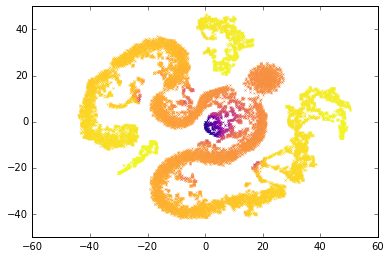

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

outDir="../models/tmp/"
modelFile="../models/tmp/rt_nbow2_fold0-model.npz"
NBOW2Flag = True
#getTsne(modelFile, outDir, NBOW2Flag)     # (un-)comment if t-SNE is (not) computed
reduced_vecs = numpy.loadtxt(outDir + "/tsne", dtype = numpy.float32)

print "Plotting t-SNE ..."

if NBOW2Flag:
    wts = numpy.loadtxt(outDir + "/wts", dtype = numpy.float32)
    f = plt.figure()
    ax = f.add_axes([0.1,0.1,0.8,0.8])
    for i in range(len(reduced_vecs)):
        ax.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='x', color=cm.plasma(wts[i]), markersize=2)
else:
    f = plt.figure()
    ax = f.add_axes([0.1,0.1,0.8,0.8])
    for i in range(len(reduced_vecs)):
        ax.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='x', color='k', markersize=2)

In [32]:
import drawTxt
import numpy
from IPython.core.display import HTML

docNum = numpy.random.randint(1, high=1000, size=1)
htmlTxt = drawTxt.printDoc("../models/tmp/rt_nbow2_fold0.test-wNwts", docNum)
print "Fold 0 test document " + str(docNum) + " \n"
HTML(htmlTxt)

Fold 0 test document [158] 

